In [28]:
import matplotlib.pyplot as plt
from scipy import datasets
import numpy as np
from scipy.ndimage import affine_transform

In [29]:
def get_affine(volume_shape, rotation=[0, 0, 0], translation=[0, 0, 0]):
    """Return 4x4 affine, which encodes rotation and translation of 3D tensors.

    Parameters
    ----------
    rotation: iterable of three numbers, the yaw, pitch, and roll,
        respectively, in radians.
    translation: iterable of three numbers, the number of voxels to translate
        in the x, y, and z directions.

    Returns
    -------
    Tensor with shape `(4, 4)` and dtype float32.
    """
    volume_shape = np.array(volume_shape).astype(np.float32)
    rotation = np.array(rotation).astype(np.float32)
    translation = np.array(translation).astype(np.float32)
    if volume_shape.shape[0] < 3:
        raise ValueError("`volume_shape` must have at least three values")
    if rotation.shape[0] != 3:
        raise ValueError("`rotation` must have three values")
    if translation.shape[0] != 3:
        raise ValueError("`translation` must have three values")

    # ROTATION
    # yaw
    rx = np.array(
        [
            [1, 0, 0, 0],
            [0, np.cos(rotation[0]), -np.sin(rotation[0]), 0],
            [0, np.sin(rotation[0]), np.cos(rotation[0]), 0],
            [0, 0, 0, 1],
        ],
        dtype=np.float32,
    )

    # pitch
    ry = np.array(
        [
            [np.cos(rotation[1]), 0, np.sin(rotation[1]), 0],
            [0, 1, 0, 0],
            [-np.sin(rotation[1]), 0, np.cos(rotation[1]), 0],
            [0, 0, 0, 1],
        ],
        dtype=np.float32,
    )

    # roll
    rz = np.array(
        [
            [np.cos(rotation[2]), -np.sin(rotation[2]), 0, 0],
            [np.sin(rotation[2]), np.cos(rotation[2]), 0, 0],
            [0, 0, 1, 0],
            [0, 0, 0, 1],
        ],
        dtype=np.float32,
    )

    # Rotation around origin.
    transform = rz @ ry @ rx

    center = (volume_shape[:3] / 2 - 0.5).astype(np.float32)
    neg_center = -1 * center
    center_to_origin = np.array(
        [
            [1, 0, 0, neg_center[0]],
            [0, 1, 0, neg_center[1]],
            [0, 0, 1, neg_center[2]],
            [0, 0, 0, 1],
        ],
        dtype=np.float32,
    )

    origin_to_center = np.array(
        [
            [1, 0, 0, center[0]],
            [0, 1, 0, center[1]],
            [0, 0, 1, center[2]],
            [0, 0, 0, 1],
        ],
        dtype=np.float32,
    )

    # Rotation around center of volume.
    transform = origin_to_center @ transform @ center_to_origin

    # TRANSLATION
    translation = np.array(
        [
            [1, 0, 0, translation[0]],
            [0, 1, 0, translation[1]],
            [0, 0, 1, translation[2]],
            [0, 0, 0, 1],
        ],
        dtype=np.float32,
    )

    transform = translation @ transform

    # REFLECTION
    #
    # TODO.
    # See http://web.iitd.ac.in/~hegde/cad/lecture/L6_3dtrans.pdf#page=7
    # and https://en.wikipedia.org/wiki/Transformation_matrix#Reflection_2

    return transform

(128, 128)


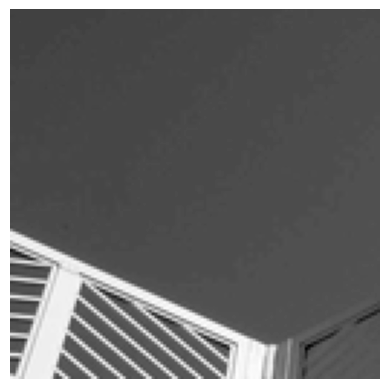

In [30]:
# Load the Lena image using misc module from scipy
lena = datasets.ascent()[:128, :128]
print(lena.shape)

# Display Lena using Matplotlib
plt.imshow(lena, cmap="gray")
plt.axis("off")  # Turn off axis
plt.show()

In [31]:
ascent3d = np.tile(lena, [128, 1, 1])
print(ascent3d.shape)

(128, 128, 128)


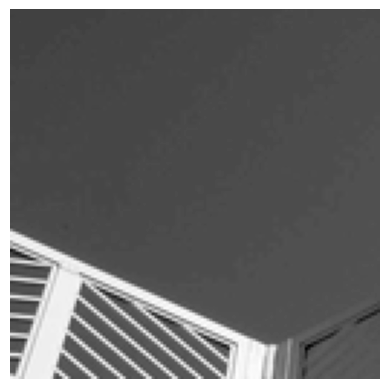

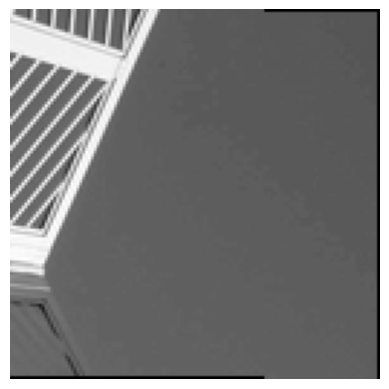

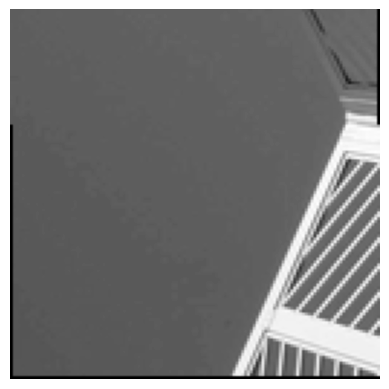

In [32]:
plt.imshow(ascent3d[0, :, :], cmap="gray")
plt.axis("off")
plt.show()

rotation = [np.pi / 2, 0, 0]  # radians
aff_mat = get_affine(ascent3d.shape, rotation=rotation)

rotated = affine_transform(ascent3d, aff_mat)
plt.imshow(rotated[0, :, :], cmap="gray")
plt.axis("off")
plt.show()

rotated = affine_transform(ascent3d, np.linalg.inv(aff_mat))
plt.imshow(rotated[0, :, :], cmap="gray")
plt.axis("off")
plt.show()

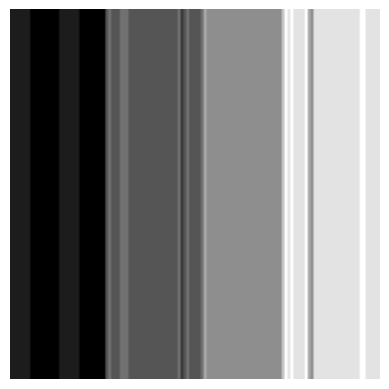

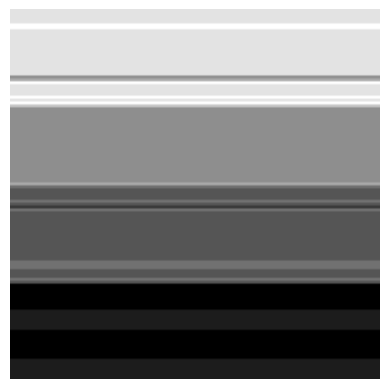

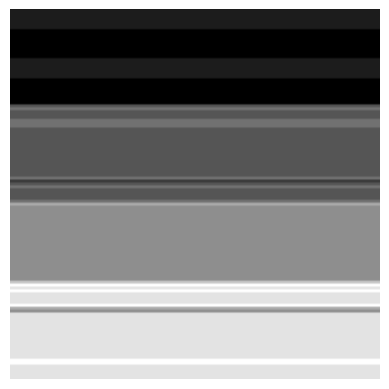

In [33]:
plt.imshow(ascent3d[:, 0, :], cmap="gray")
plt.axis("off")
plt.show()

rotation = [0, np.pi / 2, 0]  # radians
aff_mat = get_affine(ascent3d.shape, rotation=rotation)

rotated = affine_transform(ascent3d, aff_mat, order=1, mode="nearest")
plt.imshow(rotated[:, 0, :], cmap="gray")
plt.axis("off")
plt.show()

rotated = affine_transform(ascent3d, np.linalg.inv(aff_mat), order=1, mode="nearest")
plt.imshow(rotated[:, 0, :], cmap="gray")
plt.axis("off")
plt.show()

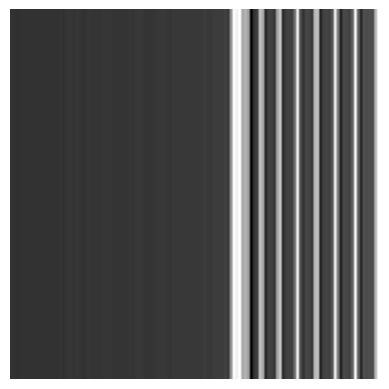

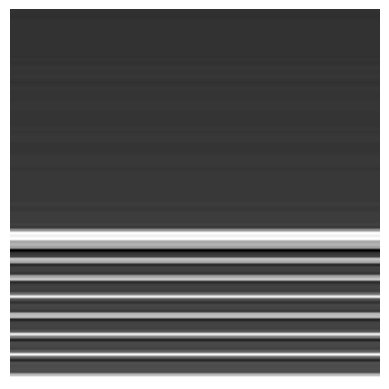

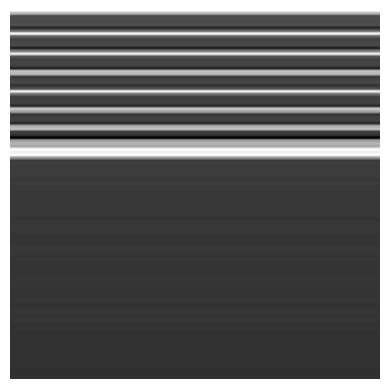

In [34]:
plt.imshow(ascent3d[:, :, 0], cmap="gray")
plt.axis("off")
plt.show()

rotation = [0, 0, np.pi / 2]  # radians
aff_mat = get_affine(ascent3d.shape, rotation=rotation)

rotated = affine_transform(ascent3d, aff_mat, order=1, mode='nearest')
plt.imshow(rotated[:, :, 0], cmap="gray")
plt.axis("off")
plt.show()

rotated = affine_transform(ascent3d, np.linalg.inv(aff_mat), order=1, mode="nearest")
plt.imshow(rotated[:, :, 0], cmap="gray")
plt.axis("off")
plt.show()